In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
from astropy.io import fits
import sys
import os
import csv
from glob import glob
import warnings
warnings.filterwarnings('ignore')

#set plotting defaults to values that make plots look publication ready
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 4
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

In [2]:
#load files
#matchedfile = 'GaiaAPOGEE_HugeTable_wDistMod.fits'
matchedfile = 'allstar_HugeTable.fits'
giant_catalog = fits.open(matchedfile)

# J-K vs K plots

In [3]:
#read in magnitudes and distance modulii
J_app = giant_catalog[1].data['J']
H_app = giant_catalog[1].data['H']
K_app = giant_catalog[1].data['K']
DistMod = giant_catalog[1].data['DistMod']

#compute the absolute mags
J_abs = J_app + DistMod
K_abs = K_app + DistMod

#find stars that lie within an acceptable range of colors and mags
realistic = np.where( (J_app - K_app > -1) & (J_app - K_app < 4) & (K_app + DistMod > -10) & (K_app + DistMod < 10) )

[-0.25, 2, 10, -10]

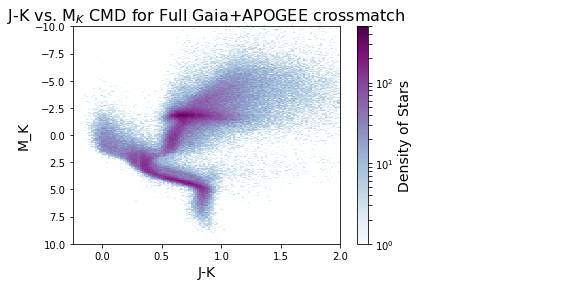

In [4]:
#use the hist2d command to show the density of APOGEE+Gaia stars in the J-K vs. M_K ColorMagnitude Diagram.
JK_CMD = plt.hist2d(J_app[realistic] - K_app[realistic], K_app[realistic] + DistMod[realistic], 
           bins=(250,250), cmap=plt.cm.BuPu, norm=clrs.LogNorm(vmin=(1), vmax=(500)))
plt.colorbar(label = 'Density of Stars')
plt.title('J-K vs. M$_{K}$ CMD for Full Gaia+APOGEE crossmatch' )
xlabel = plt.xlabel('J-K') 
ylabel = plt.ylabel('M_K')
plt.axis([-0.25,2,10,-10])

#plt.savefig('Gaia+APOGEE_J-KvsK_CMD.jpg', bbox_inches='tight')

In [5]:
#include a restriction on the quality of the parallax detection
parallax = giant_catalog[1].data['parallax']
parallax_error = giant_catalog[1].data['parallax_error']

tenSigmaParallax = np.where( ( (parallax / parallax_error) > 10) & (J_app - K_app > -1) & (J_app - K_app < 4) & (K_app + DistMod > -10) & (K_app + DistMod < 10) )

[-0.25, 2, 10, -10]

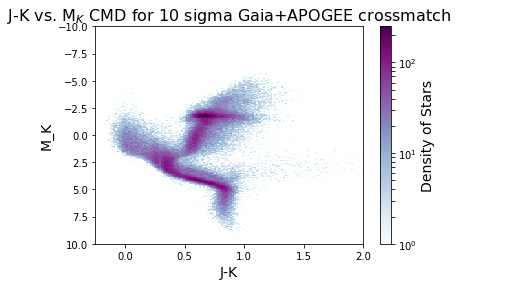

In [6]:
#use the hist2d command to show the density of APOGEE+Gaia stars in the J-K vs. M_K ColorMagnitude Diagram.
JK_CMD = plt.hist2d(J_app[tenSigmaParallax] - K_app[tenSigmaParallax], K_app[tenSigmaParallax] + DistMod[tenSigmaParallax], 
           bins=(250,250), cmap=plt.cm.BuPu, norm=clrs.LogNorm(vmin=(1), vmax=(250)))
plt.colorbar(label = 'Density of Stars')
plt.title('J-K vs. M$_{K}$ CMD for 10 sigma Gaia+APOGEE crossmatch' )
xlabel = plt.xlabel('J-K') 
ylabel = plt.ylabel('M_K')
plt.axis([-0.25,2,10,-10])

#plt.savefig('Gaia+APOGEE_J-KvsK_CMD_10Sigma.jpg', bbox_inches='tight') 

[-0.25, 2, 10, -10]

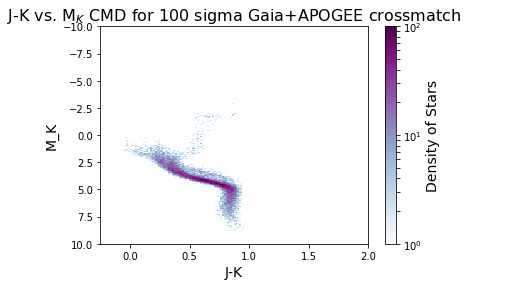

In [7]:
#finally, restrict to 100 sigma parallax detections
hundredSigmaParallax = np.where( ( (parallax / parallax_error) > 100) & (J_app - K_app > -1) & (J_app - K_app < 4) & (K_app + DistMod > -10) & (K_app + DistMod < 10) )

#use the hist2d command to show the density of APOGEE+Gaia stars in the J-K vs. M_K ColorMagnitude Diagram.
JK_CMD = plt.hist2d(J_app[hundredSigmaParallax] - K_app[hundredSigmaParallax], K_app[hundredSigmaParallax] + DistMod[hundredSigmaParallax], 
           bins=(250,250), cmap=plt.cm.BuPu, norm=clrs.LogNorm(vmin=(1), vmax=(100)))
plt.colorbar(label = 'Density of Stars')
plt.title('J-K vs. M$_{K}$ CMD for 100 sigma Gaia+APOGEE crossmatch' )
xlabel = plt.xlabel('J-K') 
ylabel = plt.ylabel('M_K')
plt.axis([-0.25,2,10,-10])

#plt.savefig('Gaia+APOGEE_J-KvsK_CMD_100Sigma.jpg', bbox_inches='tight') 

# Indexing the data

In [14]:
# Getting the field (region) indices
One91_12 = np.where(giant_catalog[1].data['field']=='191-12')
K2_C4_168_21 = np.where(giant_catalog[1].data['field']=='K2_C4_168-21')
TWO03PLUS04 = np.where(giant_catalog[1].data['field']=='203+04')
IC348 = np.where(giant_catalog[1].data['field']=='IC348')
LAMBDAORI_A = np.where(giant_catalog[1].data['field']=='LAMBDAORI-A')
LAMBDAORI_B = np.where(giant_catalog[1].data['field']=='LAMBDAORI-B')
N1333 = np.where(giant_catalog[1].data['field']=='N1333')
ORIONA = np.where(giant_catalog[1].data['field']=='ORIONA')
ORIONB = np.where(giant_catalog[1].data['field']=='ORIONB')
ORIONB_A = np.where(giant_catalog[1].data['field']=='ORIONB-A')
ORIONB_B = np.where(giant_catalog[1].data['field']=='ORIONB-B')
ORIONC = np.where(giant_catalog[1].data['field']=='ORIONC')
ORIOND = np.where(giant_catalog[1].data['field']=='ORIOND')
ORIONE = np.where(giant_catalog[1].data['field']=='ORIONE')
ORIONOB1AB_F = np.where(giant_catalog[1].data['field']=='ORIONOB1AB-F')
PLEIADES_E = np.where(giant_catalog[1].data['field']=='PLEIADES-E')
Pleiades = np.where(giant_catalog[1].data['field']=='Pleiades')

In [16]:
# The indices of MS and Pre-MS stars 
All_Indices = np.where(giant_catalog[1].data['field'])
PMS_Indices = np.unique(np.concatenate([One91_12,  K2_C4_168_21,  TWO03PLUS04,  
                IC348,  LAMBDAORI_A,  LAMBDAORI_B,  N1333,  ORIONA,  ORIONB,  
                ORIONB_A,  ORIONB_B,  ORIONC,  ORIOND,  ORIONE,  ORIONOB1AB_F,
                PLEIADES_E,  Pleiades], axis = 1))
MS_Indices = np.setdiff1d(All_Indices,PMS_Indices)

print("Double checking that this indexing works, this should equal zero")
print('ALL - PMS - MS: ', np.size(All_Indices)-(np.size(PMS_Indices)+np.size(MS_Indices)))

Double checking that this indexing works, this should equal zero
ALL - PMS - MS:  0


# Working on the Main_Sequence stars

In [17]:
#filtering the batch of MS stars
J = giant_catalog[1].data['J'][MS_Indices]
K = giant_catalog[1].data['K'][MS_Indices]
H = giant_catalog[1].data['H'][MS_Indices]
g = giant_catalog[1].data['gmag_pan'][MS_Indices]
r = giant_catalog[1].data['rmag_pan'][MS_Indices]
AP_IDS = giant_catalog[1].data['APOGEE_ID'][MS_Indices]
Source_IDS = giant_catalog[1].data['source_id'][MS_Indices]


#Every equation used in the next cell has calibration bounds, set here
t_eff_bounds = np.where((0.7 < (J-K))   &  ((J-K) < 1.05)   &  (3.37 < (g-K))   &  ((g-K)<8.46))
mass_bounds = np.where((K<10) & (K>5))
finite_bounds = np.where(np.isfinite(g) & np.isfinite(r))
calibration_index = np.intersect1d(np.intersect1d(t_eff_bounds, mass_bounds), finite_bounds)


J = J[calibration_index]
K = K[calibration_index]
H = H[calibration_index]
g = g[calibration_index]
r = r[calibration_index]
AP_IDS = AP_IDS[calibration_index]
Source_IDS = Source_IDS[calibration_index]

In [18]:
# Inferring metallicity from photometry. Eqn 1, page 8 from https://arxiv.org/pdf/1502.07460.pdf
C1 = np.array([-14.2959, 0.0519, 29.5926, -0.0529, -17.6762, 0.7032])
Fe_H = C1[0] + C1[1]*(g-K) + C1[2]*(J-K) + (C1[3] * (g-K)**2) + (C1[4] * (J-K)**2) + C1[5] * (g-K) * (J-K)




#Inferring mass in units of solar mass from M_K. Eqn 11, page 26 of https://arxiv.org/pdf/1608.04775.pdf
C2 = np.array([.2311, -.1352, .0400, .0038, -.0032])
x = 7.5
Mass = C2[0] + C2[1]*(K-x) + C2[2]*(K-x)**2 + C2[3]*(K-x)**3 + C2[4]*(K-x)**4




# Determining Teff. Eqns 6 and 7, page 11, from https://arxiv.org/pdf/1501.01635.pdf
C3 = np.array([2.532, -1.319, 0.4449, -.07151, 0.004333, 0.05629])
x = r - J
T_eff = 3500 * (C3[0] + C3[1]*x + C3[2]*x**2 + C3[3]*x**3 + C3[4]*x**4 + C3[5]*(Fe_H))

x2 = r - J
C4 = np.array([2.151, -1.092,0.3767, -0.06292, 0.003950, 0.1697, 0.03106])
T_eff2 = 3500 * (C4[0] + C4[1]*x2 + C4[2]*x2**2 + C4[3]*x2**3 + C4[4]*x2**4 + C4[5]*(J-H) + C4[6]*(J-H)**2)
T_eff_dif = T_eff2-T_eff




#Using Teff and [Fe/H] to assign log g to stars. Eqn 5, page 7 from https://arxiv.org/pdf/1710.10259.pdf
log_g = 7.912 - 0.1880 * Fe_H - 1.335e-3 * T_eff + 1.313e-7 * ( T_eff ** 2 )
log_g2 = 7.912 - 0.1880 * Fe_H - 1.335e-3 * T_eff2 + 1.313e-7 * ( T_eff2 ** 2 )

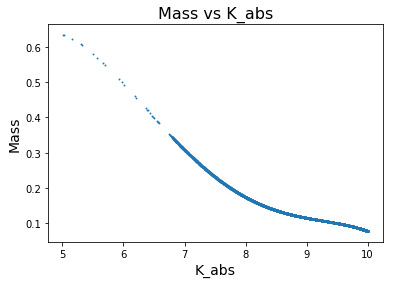

In [19]:
plt.title("Mass vs K_abs")
plt.xlabel("K_abs")
plt.ylabel("Mass")
plt.scatter(K,Mass, s = 0.8)

In [20]:
#ranges of our values
print("Min max of Fe_H:", min(Fe_H), ",", max(Fe_H))
print("Min max of Mass:", min(Mass), ",", max(Mass))
print("Min max of T_eff:", min(T_eff), ",", max(T_eff))
print("Min max of T_eff2:", min(T_eff2), ",", max(T_eff2))
print("Min max of log_g:", min(log_g), ",", max(log_g))
print("Min max of log_g2:", min(log_g2), ",", max(log_g2))

Min max of Fe_H: -1.0020233 , 0.31917048
Min max of Mass: 0.07753893 , 0.6337415
Min max of T_eff: 2647.8167 , 6477.393
Min max of T_eff2: 2821.749 , 6052.1284
Min max of log_g: 4.489062 , 5.454262
Min max of log_g2: 4.488968 , 5.3536034


# Working on the Pre-Main_Sequnce Stars

In [59]:
#Using Dr. Kounkel's list to further filter down PMS stars.
member_file = open('ysos.txt', 'r')
members = np.array(member_file.read().split('\n'))
PMS_IDs = giant_catalog[1].data['APOGEE_ID'][PMS_Indices]
member_overlap = np.array(list((set(members) & set(PMS_IDs))))

#Sifting the dating using the PMS_indices
J_PMS = giant_catalog[1].data['J'][PMS_Indices]
K_PMS = giant_catalog[1].data['K'][PMS_Indices]
H_PMS = giant_catalog[1].data['H'][PMS_Indices]


#From the already sifted data, apply the member_index.
member_index_file = open('member_index.txt', 'r')
member_index = (np.array(member_index_file.read().split('\n'))[:-1]).astype(int)


J_PMS = J_PMS[member_index]
K_PMS = K_PMS[member_index]
H_PMS = H_PMS[member_index]
PMS_IDs = PMS_IDs[member_index]

[4353 1139 2698 ... 4509 6513 1358]


In [36]:
#Using this to get a memeber_index
export = []
for x,z in enumerate(member_overlap):  
    for i, j in enumerate(PMS_IDs):
        if j == z:
            export.append(i)
            
np.savetxt('member_index.txt', export, fmt='%i', delimiter=',')   # X is an array

In [167]:
#send labels that we already have to marina: http://docs.astropy.org/en/stable/io/fits/
col1 = fits.Column(name='ap_id', format='20A', array=AP_IDS)
col2 = fits.Column(name='source_id', format='20A', array=Source_IDS)
col3 = fits.Column(name='Fe_H', format='E', array=Fe_H)
col4 = fits.Column(name='Mass', format='E', array=Mass)
col5 = fits.Column(name='T_eff', format='E', array=T_eff)
col6 = fits.Column(name='T_eff2', format='E', array=T_eff2)
col7 = fits.Column(name='log_g', format='E', array=log_g)
col8 = fits.Column(name='log_g2', format='E', array=log_g2)


cols = fits.ColDefs([col1, col2, col3, col4, col5, col6, col7, col8])
hdu_export = fits.BinTableHDU.from_columns(cols)
hdu_export.writeto('MS_Labels_w_source.fits')

In [172]:
file = 'MS_Labels_w_source.fits'
test_hdu = fits.open(file)
#print(test_hdu[1].header)

In [168]:
#print(giant_catalog[1].header)

In [16]:

#Everything below this line is the recycle bin
def find_indices(ID1,ID2,ID_min):
    ID2_index = []
    ID1_index = []
    index = 0
    for x in range(len(ID2)):
        if ID2[x] == ID1[index]:
            ID1_index.append(index)
            ID2_index.append(x)
            index += 1
        elif ID2[x] > ID1[index]:
            index += 1
        if (x+1>=ID_min):
            return ID1_index, ID2_index
    return ID1_index, ID2_index



def make_JmK_vs_MK(xaxis, yaxis, title, xtitle, ytitle):
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.ylim(10,-15)
    plt.xlim(-2.5,5)
    plt.scatter(xaxis, yaxis, s=0.01)
    plt.show()

In [35]:
#demonstrating the sort function works, but it doesn't entirely. Last index
test1 = [1,2,4,5,6,8,10,11,14]
test2 = [1,3,4,5,6,7,8,10,11,12,14,15]
testlen = min(len(test1), len(test2))
print(testlen)
test1 = np.sort(test1)
test2 = np.sort(test2)
test_index1, test_index2 = find_indices(test1,test2,testlen)

new1 = test1[test_index1]
new2 = test2[test_index2]

print(new1)
print(new2)


9
[ 1  4  5  6  8 10 11]
[ 1  4  5  6  8 10 11]


2014-08-10
XTENSION= 'IMAGE   '           / IMAGE extension                                BITPIX  =                  -32 / Number of bits per data pixel                  NAXIS   =                    1 / Number of data axes                            NAXIS1  =                 8575 /                                                PCOUNT  =                    0 / No Group Parameters                            GCOUNT  =                    1 / One Data Group                                 CRVAL1  =        4.17900000000 /                                                CDELT1  =    6.00000000000E-06 /                                                CRPIX1  =                    1 /                                                CTYPE1  = 'LOG-LINEAR'         /                                                DC-FLAG =                    1 /                                                BUNIT   = 'Flux (10^-17 erg/s/cm^2/Ang)' /                                      END                          

(15960, 16000)

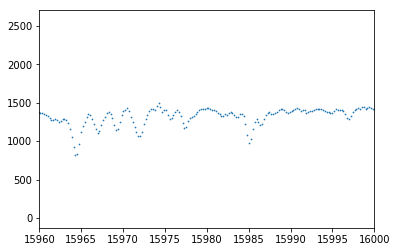

In [5]:
#A random fits file from Dr. Covey's server
random = "apStarC-r5-2M21432388+4209512.fits"
hdu = fits.open(random)


'''hdu[0].header['NAME'], where you can pull anything 
named NAME from the header file. See link (in slack) for list of NAME's. 
 https://data.sdss.org/datamodel/files/APOGEE_REDUX/APRED_VERS
/APSTAR_VERS/TELESCOPE/LOCATION_ID/apStar.html'''
date = hdu[0].header['DATE']
print(date)

#the header, showing starting wavelength and other
fluxhead = hdu[1].header 
print(fluxhead)
#the data
flux = hdu[1].data
print("\n", flux)

#relevant information (starting wavelength, and conversion) found in header
wavelength = 10.**(4.179+6e-6*np.arange(0,len(flux),1))

plt.scatter(wavelength,flux,s=0.5)
plt.xlim(15960,16000)